In [124]:
import numpy as np
from sklearn.linear_model import LinearRegression
import sys,os
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
sys.path.append(os.getcwd()+'/A4lib')
from A4lib import utils as a4ut
import importlib
importlib.reload(a4ut)


<module 'A4lib.utils' from '/Users/huangrong/Private/Hui/Sweden/LNU/S2/DeepLearning/Assignment/Main/A4lib/utils.py'>

## Repeat gradient descent with two (and more) variables

Slope (a): 1.6226270306326736
Intercept (b): -1.8958575765407035


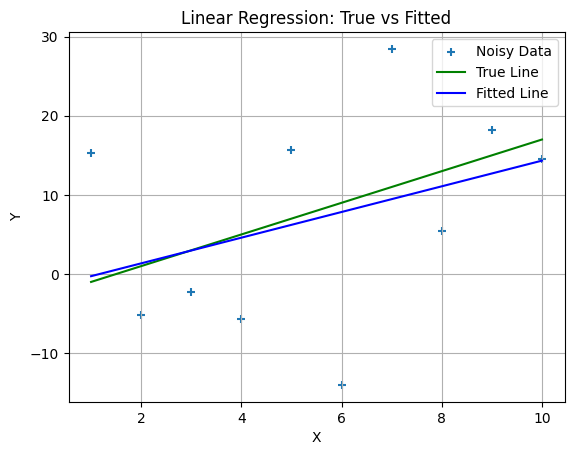

In [125]:

# Set random seed for reproducibility
np.random.seed(1)

# Parameters
N = 10      # Number of data points
a0 = 2   # True slope
b0 = -3  # True intercept

# Generate data
X = np.arange(1, N + 1)
noise = np.random.normal(0, 10, N)
Y = a0 * X + b0 + noise

# Plot noisy data
plt.scatter(X, Y, marker='+', label='Noisy Data')

# Plot true model
plt.plot(X, a0 * X + b0, color='green', label='True Line')

# Fit linear regression model
model = LinearRegression()
X_reshaped = X.reshape(-1, 1)  # sklearn expects 2D input
model.fit(X_reshaped, Y)
Y_pred = model.predict(X_reshaped)
print("Slope (a):", model.coef_[0])
print("Intercept (b):", model.intercept_)
# Plot fitted model
plt.plot(X, Y_pred, color='blue', label='Fitted Line')

# Plot decorations
plt.legend()
plt.title("Linear Regression: True vs Fitted")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


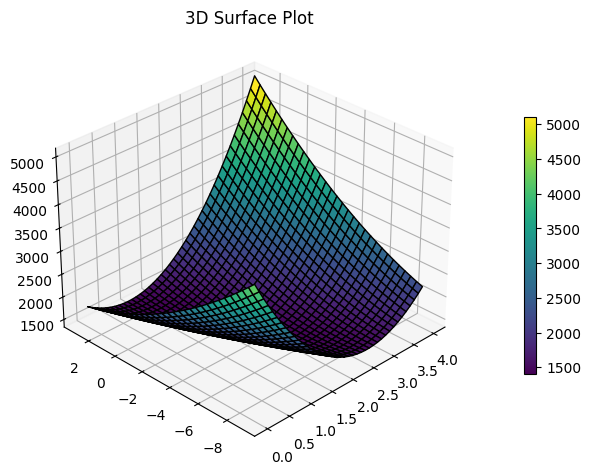

In [126]:
f = lambda a, b: a4ut.rss2(a, b, X, Y)

a_vals = np.arange(a0-2, a0+2+1e-8, 0.1)
b_vals = np.arange(b0-6, b0+6+1e-8, 0.4)
A, B = np.meshgrid(a_vals, b_vals)

a4ut.plot3d(f, A, B)
plt.show()

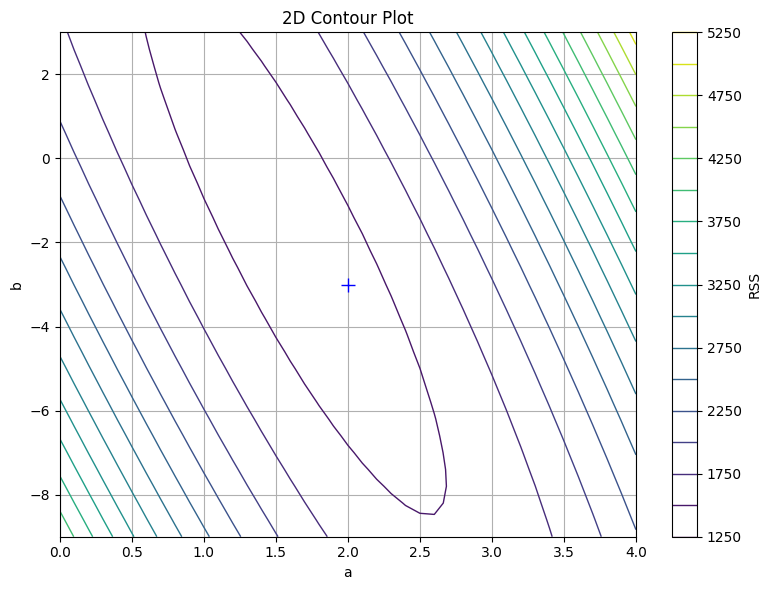

In [127]:
f = lambda a, b: a4ut.rss2(a, b, X, Y)

# Use a small epsilon like 1e-9 for arange stop value inclusivity
a_vals = np.arange(a0-2, a0+2+1e-8, 0.1)
b_vals = np.arange(b0-6, b0+6+1e-8, 0.4)
A, B = np.meshgrid(a_vals, b_vals)

# Call the new 2D contour function, show colorbar, and mark the point (a0, b0)
fig, ax = a4ut.plot2d_contour(f, A, B, show_colorbar=True, mark_point=(a0, b0))

# Display the plot
plt.show()

The gradient descent find the minimum.

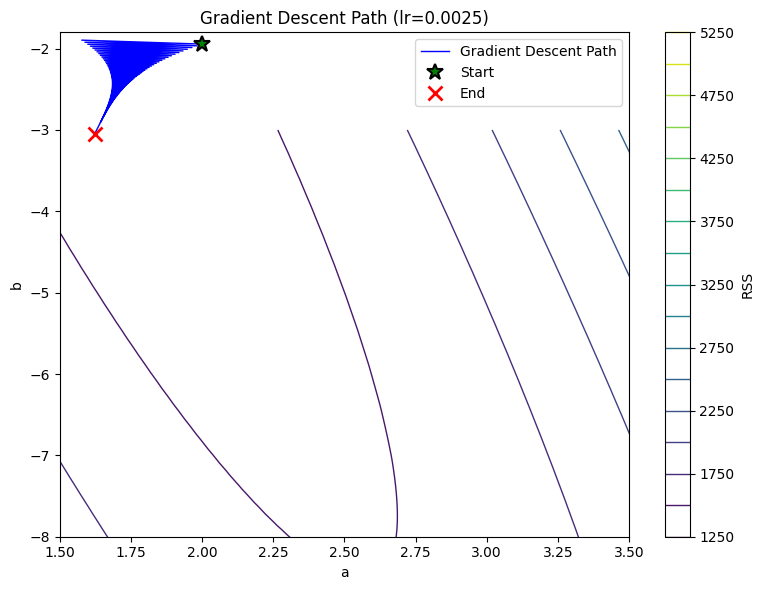

Final parameters from gradient descent:
a: 1.6226312822169182, b: -1.8958871753150044


In [133]:

# Parameters
K = 1000
learning_eps = 0.0025 # Higher learning rate produces oscillation pattern

# Define cost and gradient functions
f_cost = lambda a, b: a4ut.rss2(a, b, X, Y)
ff_grad = lambda a, b: a4ut.grad_rss2(a, b, X, Y)

# Run gradient descent
a_history, b_history = a4ut.grad_desc_rss2(
    K, a0, b0, learning_eps, f_cost, ff_grad, verbose=False
)


# Create the contour plot with gradient descent path
a_vals = np.linspace(0, 4, 100) # Adjust ranges to match your image
b_vals = np.linspace(-12, -3, 100)
A, B = np.meshgrid(a_vals, b_vals)

# Create the plot with the path
fig, ax = a4ut.plot2d_contour(
    f_cost, A, B, 
    show_colorbar=True,
    show_path=True, 
    a_history=a_history, 
    b_history=b_history,
    learning_rate=learning_eps,
    flip_path=True
)

# Remove grid if you want a cleaner look like in your image
ax.grid(False)

# Set axis limits to match the image
ax.set_xlim(1.5, 3.5) # Adjust as needed
ax.set_ylim(-8, -1.8)   # Adjust as needed

plt.show()

print("Final parameters from gradient descent:")
print(f"a: {a_history[-1]}, b: {b_history[-1]}")
# Plot the final parameters

final result


Orig: a=1.62 b=-1.90 loss=1406.49


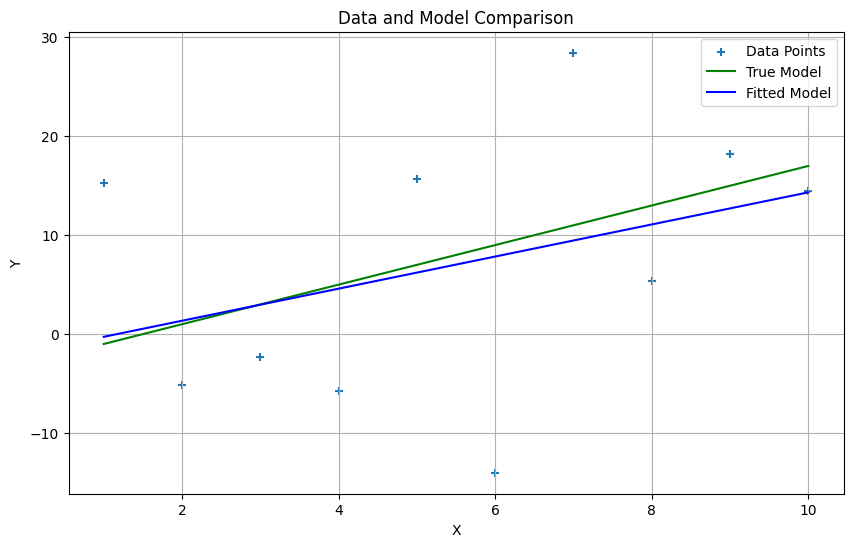

In [129]:
# Get final values after gradient descent
a_orig = a_history[-1]  # Last value in a_history (equivalent to as(K+1))
b_orig = b_history[-1]  # Last value in b_history (equivalent to bs(K+1))

# Print the results like the MATLAB fprintf
print(f"Orig: a={a_orig:.2f} b={b_orig:.2f} loss={a4ut.rss2(a_orig, b_orig, X, Y):.2f}")

# Create the scatter plot with lines for true and fitted models
plt.figure(figsize=(10, 6))

# Plot the data points with '+' markers
plt.scatter(X, Y, marker='+', label='Data Points')

# Plot the true model (green line)
plt.plot(X, a0 * X + b0, color='g', label='True Model')

# Plot the model after gradient descent (blue line)
plt.plot(X, a_orig * X + b_orig, color='b', label='Fitted Model')

# Add title, labels and legend
plt.title('Data and Model Comparison')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In my case, after gradient descent the result is sltily different from the linear regression, it's hard to see the different from the plot. So i put the result here.

##### linear regression :
Slope (a): 1.6226270306326736
Intercept (b): -1.8958575765407035

##### Final parameters from gradient descent:
a: 1.6226312822169182, b: -1.8958871753150044

## Regularization with the  𝐿2  Norm

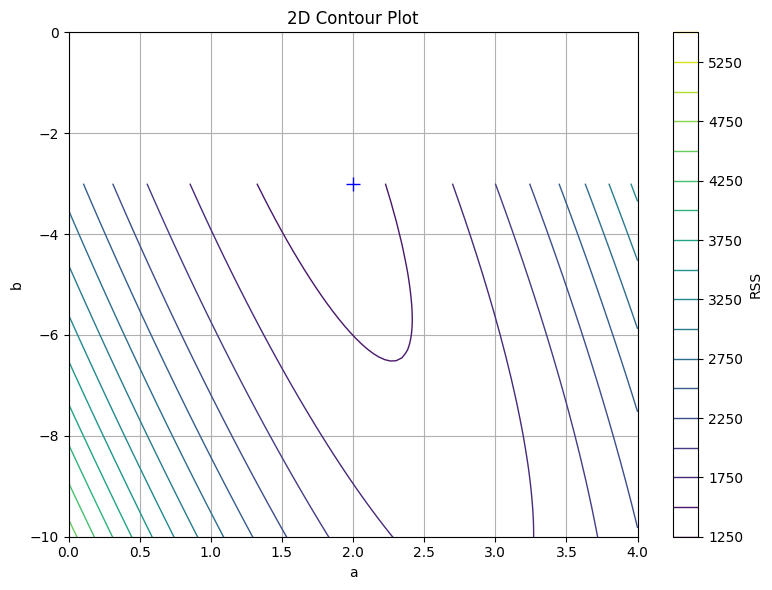

In [151]:
alpha = 1
fl2 = lambda a, b: a4ut.rss2(a, b, X, Y) + alpha * (a**2 + b**2)

# Call the new 2D contour function, show colorbar, and mark the point (a0, b0)
fig, ax = a4ut.plot2d_contour(fl2, A, B, show_colorbar=True, mark_point=(a0, b0))

# Set axis limits to match the image

ax.set_ylim(-10,0)   # Adjust as needed
plt.show()


In [ ]:
ffL2 = lambda a, b: ff_grad(a, b) + np.array([2 * alpha * a, 2 * alpha * b])
k = 1000

learning_eps = 0.0025
a_history, b_history = a4ut.grad_desc_rss2(
    k, a0, b0, learning_eps, fl2, ffL2, verbose=False
)

a_vals = np.arange(a0-2, a0+2 + 1e-8, 0.1)
b_vals = np.arange(b0-6, b0+6 + 1e-8, 0.4)
A, B   = np.meshgrid(a_vals, b_vals)

# Create the meshgrid
A, B = np.meshgrid(a_vals, b_vals)

a4ut.plot2d_contour(
    fl2, A, B, 
    show_colorbar=True,
    show_path=True, 
    a_history=a_history, 
    b_history=b_history,
    learning_rate=learning_eps,
    flip_path=True
)
plt.show()